In [38]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [39]:
data_train_path = r"D:\Introduction to Programming with Python\PythonProjects\image_classification\train"
data_test_path = r"D:\Introduction to Programming with Python\PythonProjects\image_classification\test"
data_val_path = r"D:\Introduction to Programming with Python\PythonProjects\image_classification\validation"

In [40]:
img_width = 180
img_width = 180

In [41]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle= True ,
    image_size = (img_width,img_width),
    batch_size = 32,
    validation_split = False
)

Found 3115 files belonging to 36 classes.


In [42]:
data_cat = data_train.class_names

In [43]:
data_val =tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle= False ,
    image_size = (img_width,img_width),
    batch_size = 32,
    validation_split = False
)

Found 351 files belonging to 36 classes.


In [44]:
data_test =tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle= False ,
    image_size = (img_width,img_width),
    batch_size = 32,
    validation_split = False
)

Found 359 files belonging to 36 classes.


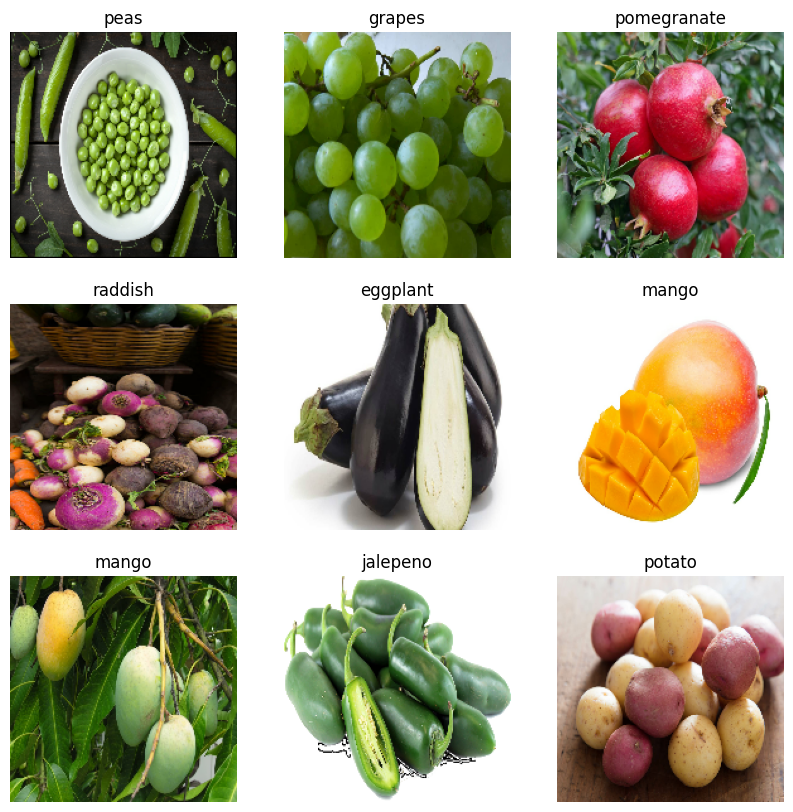

In [45]:
plt.figure(figsize=(10,10))
for image , labels in data_train.take(1):
    for i in range (9):
        plt.subplot( 3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [54]:
model = keras.Sequential([
    # Conv2D layer with 32 filters and a 3x3 kernel
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3 , padding='same' , activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3 , padding='same' , activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
    
])

In [55]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
epochs_size = 25
history = model.fit(data_train, validation_data= data_val, epochs= epochs_size)

Epoch 1/25
30/98 ━━━━━━━━━━━━━━━━━━━━ 1:40 1s/step - accuracy: 0.0275 - loss: 3.9746